In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [350]:
'''
Reads a comma-separated values (csv) file into DataFrame.

'''
data = pd.read_csv('C:\\Users\\DELL\\Downloads\\minute_weather.csv\\minute_weather.csv')


In [351]:
print(data.isnull().sum())

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64


In [352]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [353]:
sampled_df = data[(data['rowID'] % 10) == 0]

In [354]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4
50,50,2011-09-10 00:50:49,912.1,63.68,102.0,1.2,119.0,1.5,92.0,1.0,0.0,0.0,51.4


In [355]:
sampled_df['Year']=sampled_df['hpwren_timestamp'].str.split('-').str[0]
sampled_df['Month']=sampled_df['hpwren_timestamp'].str.split('-').str[1]
sampled_df['Day']=sampled_df['hpwren_timestamp'].str.split('-').str[2]

In [356]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,Year,Month,Day
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5,2011,09,10 00:10:49
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3,2011,09,10 00:20:49
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9,2011,09,10 00:30:49
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4,2011,09,10 00:40:49
50,50,2011-09-10 00:50:49,912.1,63.68,102.0,1.2,119.0,1.5,92.0,1.0,0.0,0.0,51.4,2011,09,10 00:50:49


In [357]:
sampled_df['Year'].unique()

array(['2011', '2012', '2013', '2014'], dtype=object)

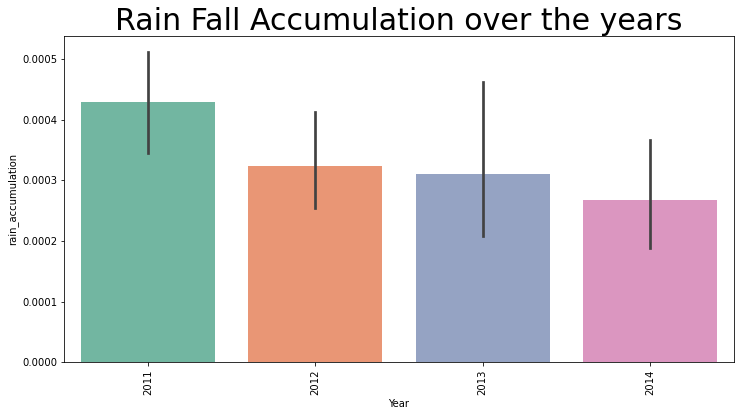

In [361]:
plt.figure(figsize=(12,6))
sns.barplot(sampled_df['Year'], sampled_df['rain_accumulation'], palette='Set2')
plt.title('Rain Fall Accumulation over the years', size=30)
plt.xticks(rotation=90)
plt.show()

In [364]:
sampled_df.set_index('Year', inplace=True)
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,Month,Day
Year,,,,,,,,,,,,,,,
2011,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5,09,10 00:10:49
2011,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3,09,10 00:20:49
2011,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9,09,10 00:30:49
2011,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4,09,10 00:40:49
2011,50,2011-09-10 00:50:49,912.1,63.68,102.0,1.2,119.0,1.5,92.0,1.0,0.0,0.0,51.4,09,10 00:50:49


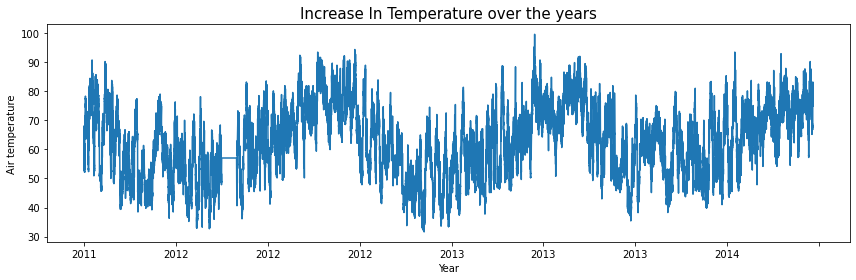

In [367]:
plt.figure(figsize=(12,4))
sampled_df['air_temp'].plot()
plt.xlabel('Year', fontsize= 10)
plt.ylabel('Air temperature',fontsize= 10)
plt.title('Increase In Temperature over the years',fontsize= 15)
plt.tight_layout()

In [255]:
sampled_df.shape

(158679, 13)

In [238]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158679.0,793632.337045,458195.148675,10.00,396835.0,793660.00,1190385.00,1587250.00
air_pressure,158679.0,916.830436,3.051676,905.00,914.8,916.70,918.70,929.50
air_temp,158679.0,61.855764,11.832551,31.64,52.7,62.42,70.88,99.50
avg_wind_direction,158679.0,162.156511,95.278361,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158679.0,2.775225,2.057627,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158679.0,163.462506,92.452317,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158679.0,3.400569,2.418805,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158679.0,166.774532,97.441200,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158679.0,2.134671,1.742116,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158679.0,0.000318,0.011238,0.00,0.0,0.00,0.00,3.12


In [239]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape
sampled_df[sampled_df['rain_duration'] == 0].shape

(157192, 13)

In [240]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [242]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [253]:
centers_normalized = kmeans.cluster_centers_
centers_backscaled = scaler.inverse_transform(centers_normalized)

# Create a DataFrame of back-scaled cluster centers
centers_df = pd.DataFrame(centers_backscaled, columns=features)

print(centers_df)

    air_pressure   air_temp  avg_wind_direction  avg_wind_speed  \
0     920.621979  61.590426           44.502084        1.889760   
1     917.068037  52.298141           44.433292        1.655835   
2     913.081048  52.064718          205.538642        6.964896   
3     917.122128  72.714871          300.920080        1.481176   
4     917.954796  50.545152          285.950186        1.621999   
5     916.060250  72.519578           37.599390        1.567025   
6     914.431868  47.109276          199.661538        4.009160   
7     920.484962  57.708427           51.559581        8.389681   
8     917.554676  66.831182          342.361627        1.446445   
9     920.551060  60.684586           52.972389        4.906789   
10    914.267671  63.276717          175.965855        1.813168   
11    916.202871  69.277666          201.651381        4.408229   
12    916.596942  49.115284          193.695859        1.657145   
13    916.364402  75.405590          190.586426        1.58704

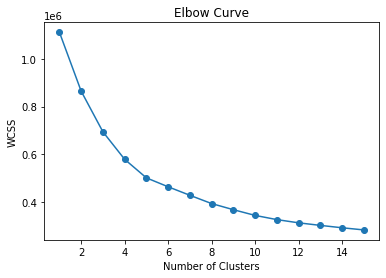

In [243]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']


select_df = sampled_df[features]

X = StandardScaler().fit_transform(select_df)
X



# Perform K-means clustering with different numbers of clusters
max_clusters = 15
wcss = []
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [244]:
def pd_centers(featuresUsed, centers):
     """
    Create a pandas DataFrame with cluster centers and predictions.

    Args:
        featuresUsed (list): List of feature names.
        centers (ndarray): Cluster centers.

    Returns:
        pd.DataFrame: DataFrame with cluster centers and predictions.
    """
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P


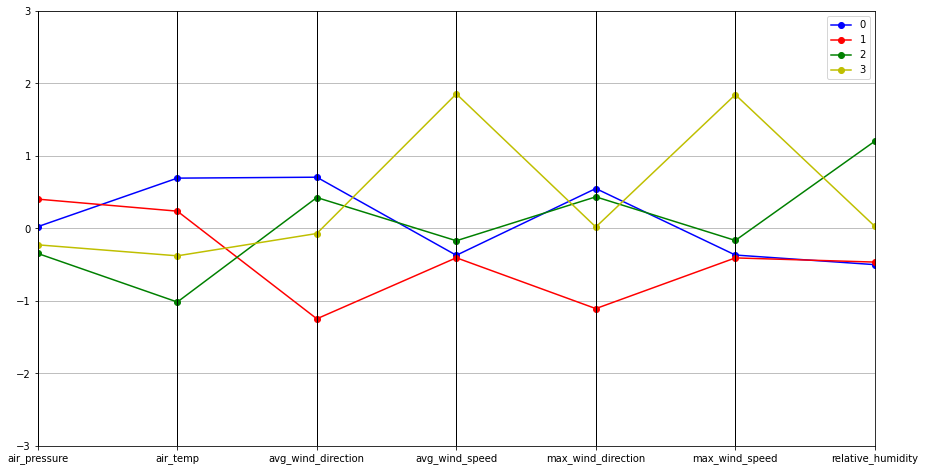

In [245]:
def parallel_plot(data):
    num_clusters = data['prediction'].nunique()
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, num_clusters))
    plt.figure(figsize=(15, 8)).gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, 'prediction', color=my_colors, marker='o')

P = pd_centers(features, centers)
parallel_plot(P)

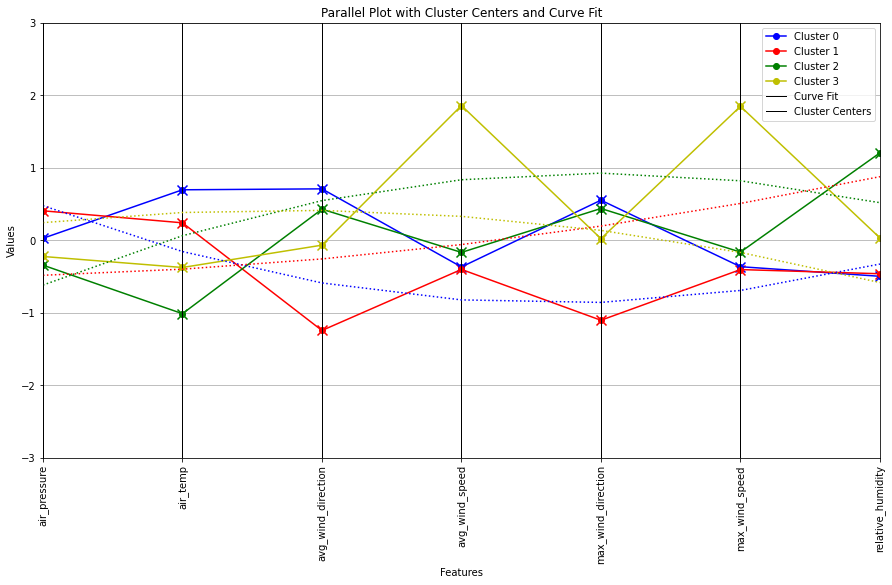

In [246]:
def parallel_plot(data, centers, curve_fit_results):
    """
    Plot parallel coordinates with cluster centers and curve fit lines.

    Args:
        data (pd.DataFrame): Data with cluster predictions.
        centers (ndarray): Cluster centers.
        curve_fit_results (list): Curve fitting results for each cluster.
    """
    num_clusters = data['prediction'].nunique()
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, num_clusters))
    plt.figure(figsize=(15, 8)).gca().axes.set_ylim([-3, +3])

    # Plot the parallel coordinates
    parallel_coordinates(data, 'prediction', color=my_colors, marker='o')

    # Generate the curve fit values for each cluster
    x = np.arange(len(data.columns) - 1)
    for i, curve_fit_result in enumerate(curve_fit_results):
        curve_fit_values = fit_curve(x, *curve_fit_result)
        plt.plot(x, curve_fit_values, color=my_colors[i], linestyle='dotted')

    # Scatter plot the cluster centers
    for i, center in enumerate(centers):
        plt.scatter(range(len(center)), center, color=my_colors[i], marker='x', s=100)

    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title('Parallel Plot with Cluster Centers and Curve Fit')
    plt.legend(['Cluster {}'.format(i) for i in range(num_clusters)] + ['Curve Fit', 'Cluster Centers'])
    plt.xticks(range(len(data.columns) - 1), data.columns[:-1], rotation=90)
    plt.show()

P = pd_centers(features, centers)
parallel_plot(P, centers, curve_fit_results)

In [307]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,Month,Day
Year,,,,,,,,,,,,,,,
2011-01-01,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5,09,10 00:10:49
2011-01-01,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3,09,10 00:20:49
2011-01-01,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9,09,10 00:30:49
2011-01-01,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4,09,10 00:40:49
2011-01-01,50,2011-09-10 00:50:49,912.1,63.68,102.0,1.2,119.0,1.5,92.0,1.0,0.0,0.0,51.4,09,10 00:50:49


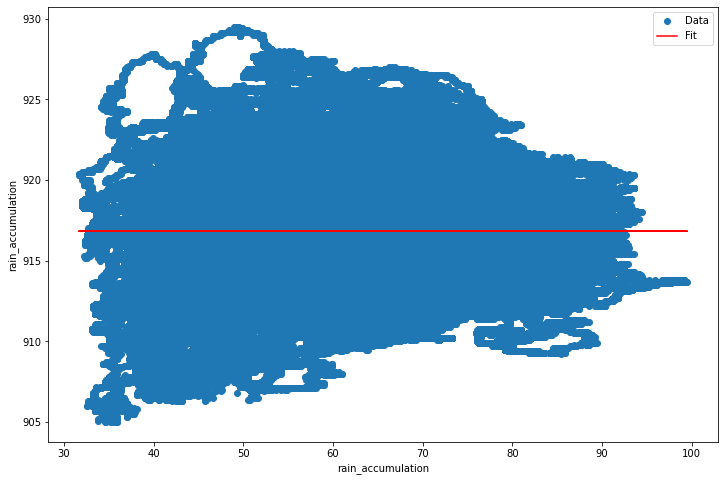

In [370]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Define the logistic function
def logistic_func(x, a, b, c):
    return c / (1 + np.exp(-(x - b) / a))

# Load the dataset from a CSV file
data = pd.read_csv('C:\\Users\\DELL\\Downloads\\minute_weather.csv\\minute_weather.csv')
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.dropna(inplace=True)
x_data = data['air_temp'].values
y_data = data['air_pressure'].values

# Fit the data to the logistic function
params, params_covariance = curve_fit(logistic_func, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, logistic_func(x_data, a_fit, b_fit, c_fit), 'r-', label='Fit')
plt.xlabel('rain_accumulation')
plt.ylabel('rain_accumulation')
plt.legend()
plt.show()
